### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [173]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [174]:
data = pd.read_csv('data/coupons.csv')

In [175]:
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

2. Investigate the dataset for missing or problematic data.

In [176]:
data.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

3. Decide what to do about your missing data -- drop, replace, other...

Missing Data: The Car column contains 12,576 missing values out of 12,684 total 
rows—approximately 99.1% missing. This means only 108 rows have valid entries, making the column extremely sparse. Such limited information is unlikely to add value to the analysis and may introduce noise. Therefore, this column can be safely dropped.
Other columns with missing values include:

Bar: 107 missing

CoffeeHouse: 217 missing

CarryAway: 151 missing

RestaurantLessThan20: 130 missing

Restaurant20To50: 189 missing

Each of these represents less than 2% missing data, which is typically acceptable.
In cases where missing values cannot be reliably imputed and account for less than 5% 
of the data, it is generally safe to ignore them in the analysis.

In [186]:
data.duplicated().sum()


74

In [193]:
data[data.duplicated]

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
4192,Work,Alone,Sunny,80,7AM,Carry out & Take away,1d,Male,26,Single,0,Associates degree,Unemployed,Less than $12500,NaN,less1,never,1~3,less1,less1,1,1,1,0,1,1
4236,Work,Alone,Sunny,80,7AM,Carry out & Take away,1d,Male,26,Single,0,Graduate degree (Masters or Doctorate),Management,$25000 - $37499,NaN,4~8,gt8,gt8,4~8,less1,1,1,1,0,1,1
4280,Work,Alone,Sunny,80,7AM,Carry out & Take away,1d,Female,26,Single,0,Bachelors degree,Education&Training&Library,$50000 - $62499,NaN,1~3,never,4~8,1~3,less1,1,1,1,0,1,1
4324,Work,Alone,Sunny,80,7AM,Carry out & Take away,1d,Female,46,Single,0,Some college - no degree,Protective Service,$25000 - $37499,NaN,1~3,never,4~8,1~3,1~3,1,1,1,0,1,1
4409,Work,Alone,Sunny,80,7AM,Carry out & Take away,1d,Female,21,Single,0,Bachelors degree,Life Physical Social Science,$37500 - $49999,NaN,less1,never,less1,1~3,never,1,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8511,Home,Alone,Sunny,80,6PM,Bar,2h,Male,46,Married partner,1,Graduate degree (Masters or Doctorate),Management,$87500 - $99999,NaN,less1,1~3,1~3,less1,1~3,1,0,0,1,0,1
8512,Home,Partner,Sunny,30,10PM,Carry out & Take away,2h,Male,46,Married partner,1,Graduate degree (Masters or Doctorate),Management,$87500 - $99999,NaN,less1,1~3,1~3,less1,1~3,1,1,0,0,1,1
8513,Work,Alone,Rainy,55,7AM,Restaurant(<20),2h,Male,46,Married partner,1,Graduate degree (Masters or Doctorate),Management,$87500 - $99999,NaN,less1,1~3,1~3,less1,1~3,1,1,1,0,1,0
8515,Work,Alone,Snowy,30,7AM,Restaurant(20-50),1d,Male,46,Married partner,1,Graduate degree (Masters or Doctorate),Management,$87500 - $99999,NaN,less1,1~3,1~3,less1,1~3,1,1,1,0,1,0


In [208]:
data = pd.read_csv("data/coupons.csv")  # or wherever you loaded from
data.drop_duplicates(inplace=True)

12609

In [209]:
 data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12610 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12610 non-null  object
 1   passanger             12610 non-null  object
 2   weather               12610 non-null  object
 3   temperature           12610 non-null  int64 
 4   time                  12610 non-null  object
 5   coupon                12610 non-null  object
 6   expiration            12610 non-null  object
 7   gender                12610 non-null  object
 8   age                   12610 non-null  object
 9   maritalStatus         12610 non-null  object
 10  has_children          12610 non-null  int64 
 11  education             12610 non-null  object
 12  occupation            12610 non-null  object
 13  income                12610 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12503 non-null

4. What proportion of the total observations chose to accept the coupon?



In [213]:
(data['Y']==1).sum()/len(data)

0.5675654242664552

5. Use a bar plot to visualize the `coupon` column.

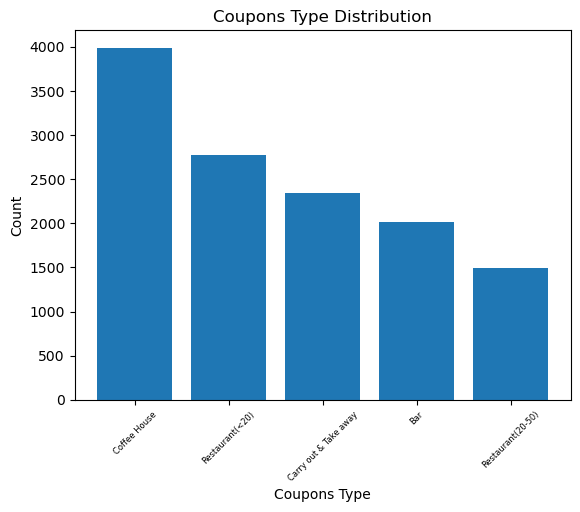

In [231]:
group_count=data["coupon"].value_counts()
plt.bar(group_count.index, group_count)
plt.xticks(rotation=45,fontsize=6)
plt.title('Coupons Type Distribution')
plt.ylabel('Count')
plt.xlabel('Coupons Type')
plt.savefig('plot1.png')

6. Use a histogram to visualize the temperature column.

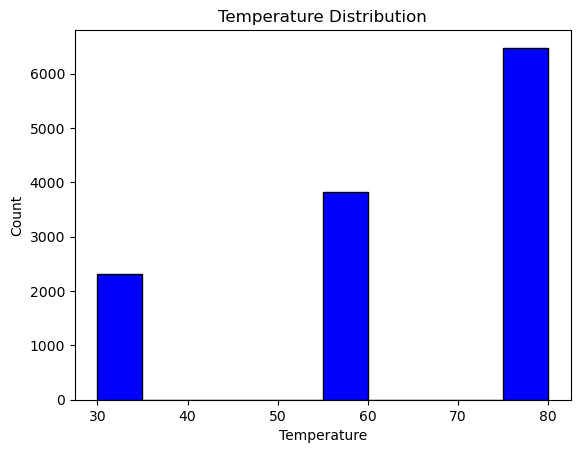

In [215]:
plt.hist(data["temperature"], bins=10, color='blue', edgecolor='black')
plt.title('Temperature Distribution')
plt.ylabel('Count')
plt.xlabel('Temperature')
plt.savefig('plot2.png')

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [216]:
bar_coupons = data[data["coupon"]=="Bar"]
bar_coupons

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,NaN,never,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,NaN,never,less1,4~8,4~8,less1,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12663,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,NaN,never,never,1~3,4~8,1~3,1,1,0,0,1,0
12664,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,NaN,never,never,1~3,4~8,1~3,1,1,0,0,1,0
12667,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,NaN,never,never,1~3,4~8,1~3,1,1,0,0,1,0
12670,No Urgent Place,Partner,Rainy,55,6PM,Bar,2h,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,NaN,never,never,1~3,4~8,1~3,1,1,0,0,1,0


2. What proportion of bar coupons were accepted?


In [217]:
(bar_coupons['Y']==1).sum()/len(bar_coupons)

0.4099502487562189

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [218]:
grouped = bar_coupons.groupby('Bar')
group_names = grouped.groups.keys()
print(list(group_names))

['1~3', '4~8', 'gt8', 'less1', 'never']


In [219]:
filtered_bar_coupons1=bar_coupons[bar_coupons["Bar"].isin(["1~3","less1","never"])]
acceptance_rate1=filtered_bar_coupons1["Y"].sum()/len(filtered_bar_coupons1)
acceptance_rate1


0.370391061452514

In [220]:
filtered_bar_coupons2=bar_coupons[bar_coupons["Bar"].isin(["4~8","gt8"])]
acceptance_rate2=filtered_bar_coupons2["Y"].sum()/len(filtered_bar_coupons2)
acceptance_rate2


0.7688442211055276

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [221]:
bar_coupons1 = data[data["coupon"]=="Bar"].copy() 
bar_coupons1["age"] = pd.to_numeric(bar_coupons1["age"], errors='coerce')
filtered_bar_coupons3 = bar_coupons1[
    (bar_coupons1["Bar"].isin(["1~3", "4~8", "gt8"])) &
    (bar_coupons1["age"] > 25)
]
acceptance_rate3=filtered_bar_coupons3["Y"].sum()/len(filtered_bar_coupons3)
acceptance_rate3

0.6997167138810199

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [222]:
grouped = bar_coupons.groupby('occupation')
group_names1 = grouped.groups.keys()

In [223]:
filtered_bar_coupons4 = bar_coupons1[
     (bar_coupons1["Bar"].isin(["1~3", "4~8", "gt8"])) &
    (bar_coupons1["passanger"]!="Kid(s)") &
    (~bar_coupons1["occupation"].isin(['Farming Fishing & Forestry']))
]
acceptance_rate4=filtered_bar_coupons4["Y"].sum()/len(filtered_bar_coupons4)
acceptance_rate4


0.7132486388384754

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [224]:
grouped = bar_coupons.groupby('maritalStatus')
group_names2= grouped.groups.keys()
print(list(group_names2))

['Divorced', 'Married partner', 'Single', 'Unmarried partner', 'Widowed']


In [225]:
grouped = bar_coupons.groupby('RestaurantLessThan20')
group_names3= grouped.groups.keys()
print(list(group_names3))

['1~3', '4~8', 'gt8', 'less1', 'never']


In [226]:
grouped = bar_coupons.groupby('income')
group_names4= grouped.groups.keys()
print(list(group_names4))

['$100000 or More', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999', '$50000 - $62499', '$62500 - $74999', '$75000 - $87499', '$87500 - $99999', 'Less than $12500']


In [227]:
filtered_bar_coupons5_1 = bar_coupons1[
     (bar_coupons1["Bar"].isin(["1~3", "4~8", "gt8"])) &
    (bar_coupons1["passanger"]!="Kid(s)") &
    (bar_coupons1["maritalStatus"]!="Widowed")
]
acceptance_rate5_1=filtered_bar_coupons5_1["Y"].sum()/len(filtered_bar_coupons5_1)
print(acceptance_rate5_1)

filtered_bar_coupons5_2 = bar_coupons1[
     (bar_coupons1["Bar"].isin(["1~3", "4~8", "gt8"])) &
    (bar_coupons1["age"]<30)]
    
acceptance_rate5_2=filtered_bar_coupons5_2["Y"].sum()/len(filtered_bar_coupons5_2)
print(acceptance_rate5_2)

RestaurantLessThan20_cleaned = data.copy()
RestaurantLessThan20_cleaned_1 = RestaurantLessThan20_cleaned[(RestaurantLessThan20_cleaned["income"].
                    isin(['Less than $12500','$12500 - $24999', '$25000 - $37499', '$37500 - $49999']))&
                     (RestaurantLessThan20_cleaned["RestaurantLessThan20"].isin(['4~8', 'gt8']))]                             
               
acceptance_rate5_3=RestaurantLessThan20_cleaned_1["Y"].sum()/len(RestaurantLessThan20_cleaned_1)
print(acceptance_rate5_3)

0.7132486388384754
0.7313432835820896
0.6002644336712208


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [150]:
grouped = data.groupby('coupon')
group_names4 = grouped.groups.keys()
print(list(group_names4))

['Bar', 'Carry out & Take away', 'Coffee House', 'Restaurant(20-50)', 'Restaurant(<20)']


In [151]:
carryAway_coupons = data[data["coupon"]=="Carry out & Take away"]
carryAway_coupons

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,1
6,No Urgent Place,Friend(s),Sunny,55,2PM,Carry out & Take away,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,1
8,No Urgent Place,Kid(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,1
19,Work,Alone,Sunny,80,7AM,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,1,0,1
25,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Male,21,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,NaN,never,less1,4~8,4~8,less1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12665,No Urgent Place,Friend(s),Sunny,30,10AM,Carry out & Take away,2h,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,NaN,never,never,1~3,4~8,1~3,1,0,0,0,1,1
12672,Home,Alone,Sunny,80,6PM,Carry out & Take away,2h,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,NaN,never,never,1~3,4~8,1~3,1,1,0,1,0,0
12673,Home,Alone,Sunny,30,6PM,Carry out & Take away,1d,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,NaN,never,never,1~3,4~8,1~3,1,0,0,0,1,0
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,NaN,never,never,1~3,4~8,1~3,1,0,0,1,0,1


In [232]:
(carryAway_coupons['Y']==1).sum()/len(carryAway_coupons)

0.7354784788967823

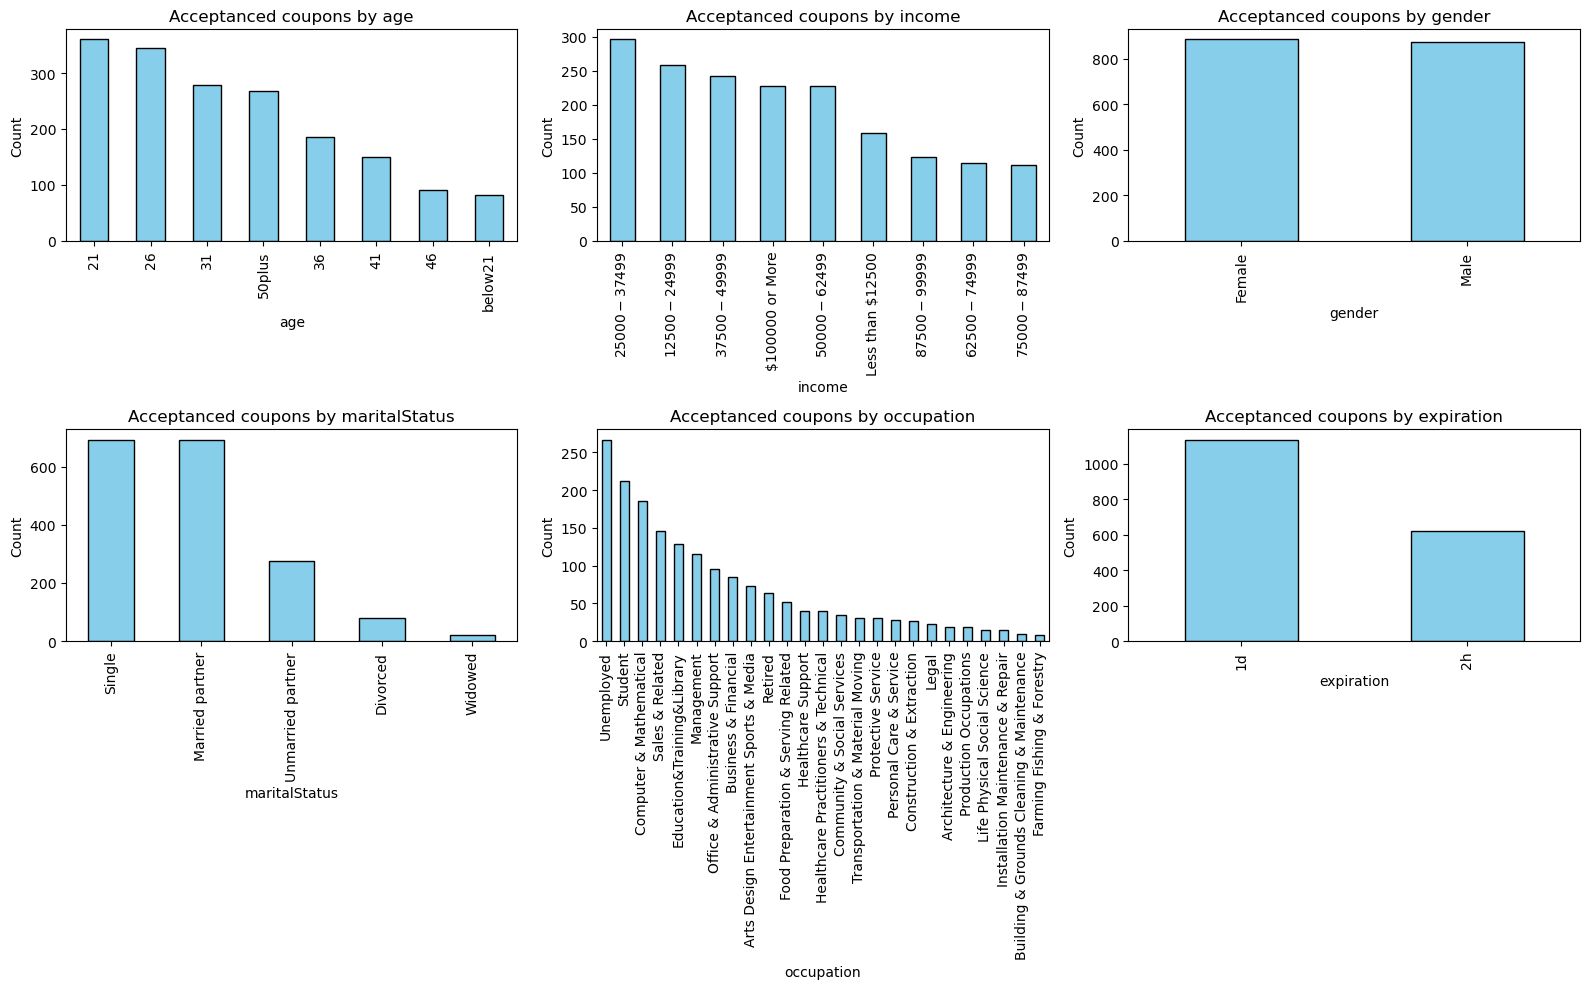

In [263]:
#carryAway_coupons['Y'] = pd.to_numeric(carryAway_coupons['Y'], errors='coerce')
accepted_coupon=carryAway_coupons[carryAway_coupons["Y"]==1]
# List of features to analyze
features = ['age','income', 'gender', 'maritalStatus', 'occupation','expiration']

# Create subplots
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.flatten()

# Loop through each feature and plot
for i, feature in enumerate(features):
    group_count = accepted_coupon[feature].value_counts().sort_values(ascending=False)
    group_count.plot(kind='bar', ax=axes[i], color='skyblue', edgecolor='black')
    axes[i].set_title(f'Acceptanced coupons by {feature}')
    axes[i].set_ylabel('Count')
    axes[i].set_xlabel(feature)
    axes[i].tick_params(axis='x', rotation=90)

plt.tight_layout()
#plt.show()
plt.savefig('plot3.png')

In [241]:
carryAway_coupons1 = data[data["coupon"]=="Carry out & Take away"].copy() 
carryAway_coupons1["age"] = pd.to_numeric(carryAway_coupons1["age"], errors='coerce')
filtered_carryAway_coupon1 = carryAway_coupons1[
    (carryAway_coupons1["age"] ==21)
]
acceptance_rate6=filtered_carryAway_coupon1["Y"].sum()/len(filtered_carryAway_coupon1)
acceptance_rate6

0.7410526315789474

In [252]:
filtered_carryAway_coupon2 = carryAway_coupons1[
    (carryAway_coupons1["income"].isin(['$25000 - $37499']))
]
acceptance_rate7=filtered_carryAway_coupon2["Y"].sum()/len(filtered_carryAway_coupon2)
acceptance_rate7

0.7786666666666666

In [250]:
filtered_carryAway_coupon3 = carryAway_coupons1[
    (carryAway_coupons1["gender"].isin(['Female']))
]
acceptance_rate8=filtered_carryAway_coupon3["Y"].sum()/len(filtered_carryAway_coupon3)
acceptance_rate8

0.7126341866226259

In [253]:
filtered_carryAway_coupon4 = carryAway_coupons1[
    (carryAway_coupons1["maritalStatus"].isin(['Single']))
]
acceptance_rate9=filtered_carryAway_coupon4["Y"].sum()/len(filtered_carryAway_coupon4)
acceptance_rate9

0.7455156950672646

In [258]:
filtered_carryAway_coupon5 = carryAway_coupons1[
    (carryAway_coupons1["occupation"].isin(['Unemployed']))
]
acceptance_rate10=filtered_carryAway_coupon5["Y"].sum()/len(filtered_carryAway_coupon5)
acceptance_rate10

0.7543352601156069